In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('C:/Users/User/Desktop/EBAC Curso/Modulo 10/ecommerce_preparados.csv', encoding='utf-8')

# Verificar informações gerais sobre colunas e tipos de dados
print(df.head().to_string())
print(df.info())



   Unnamed: 0                                                        Título  Nota  N_Avaliações  Desconto                            Marca   Material      Gênero        Temporada                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Review1                                                                                                                                                                                                                                                                                                                                        

C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


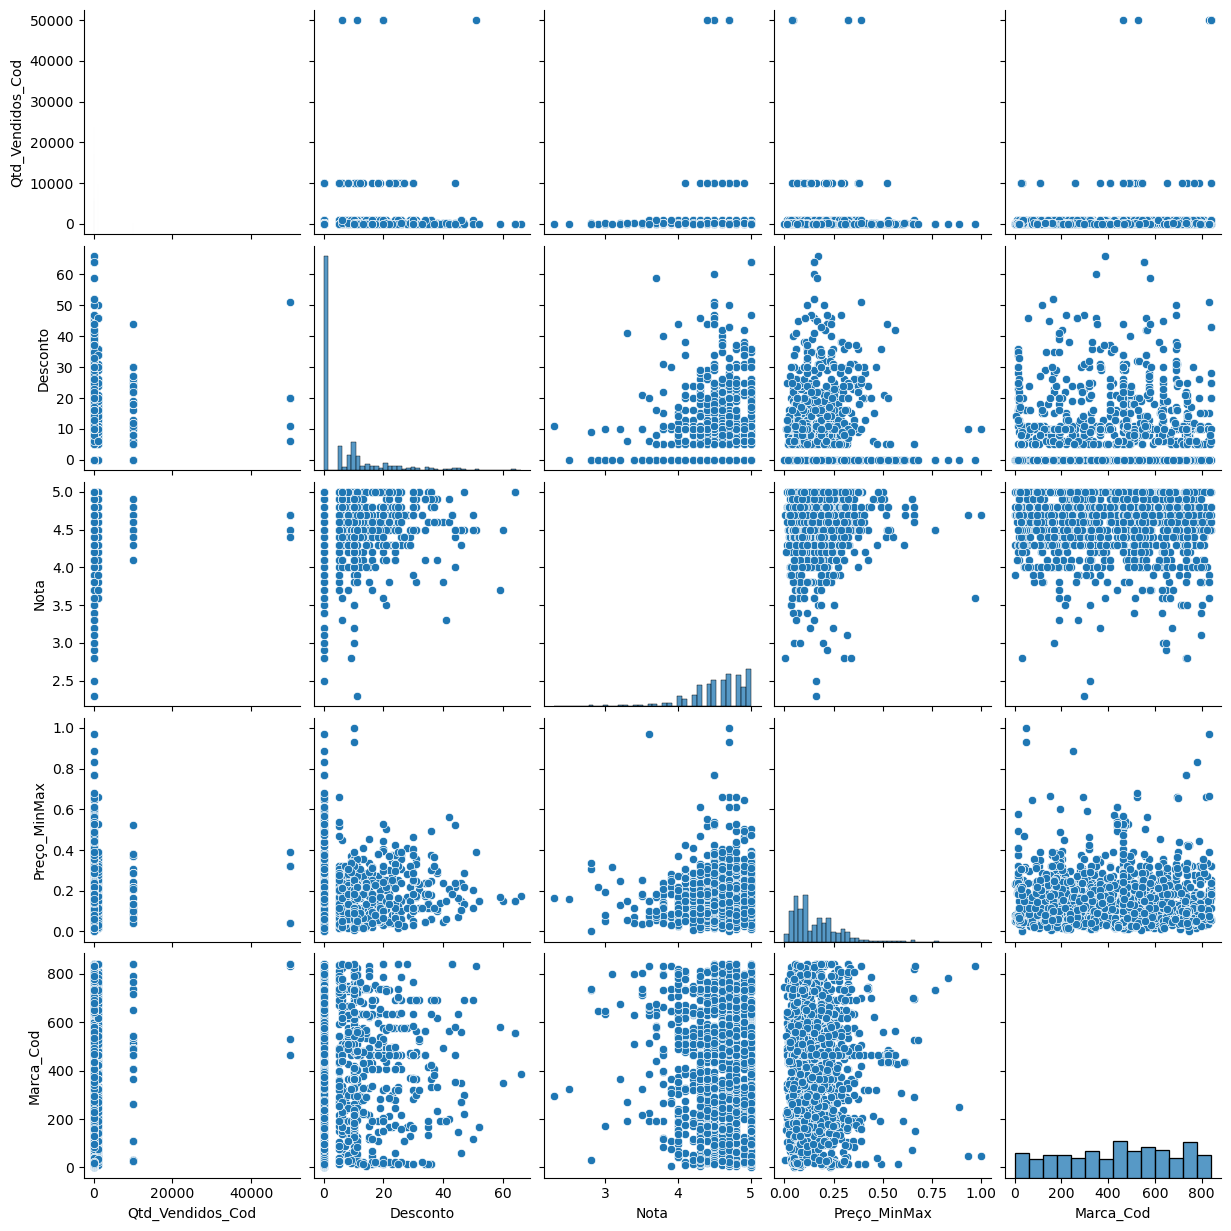

In [7]:
#Tratamentos de colunas
df['Desconto'] = df['Desconto'].fillna(0)  # Substitui NaN por 0 (zero)

# Gráfico de Pairplot (Dispersão e Histograma)
sns.pairplot(df[['Qtd_Vendidos_Cod', 'Desconto', 'Nota','Preço_MinMax',"Marca_Cod",]])
plt.show()

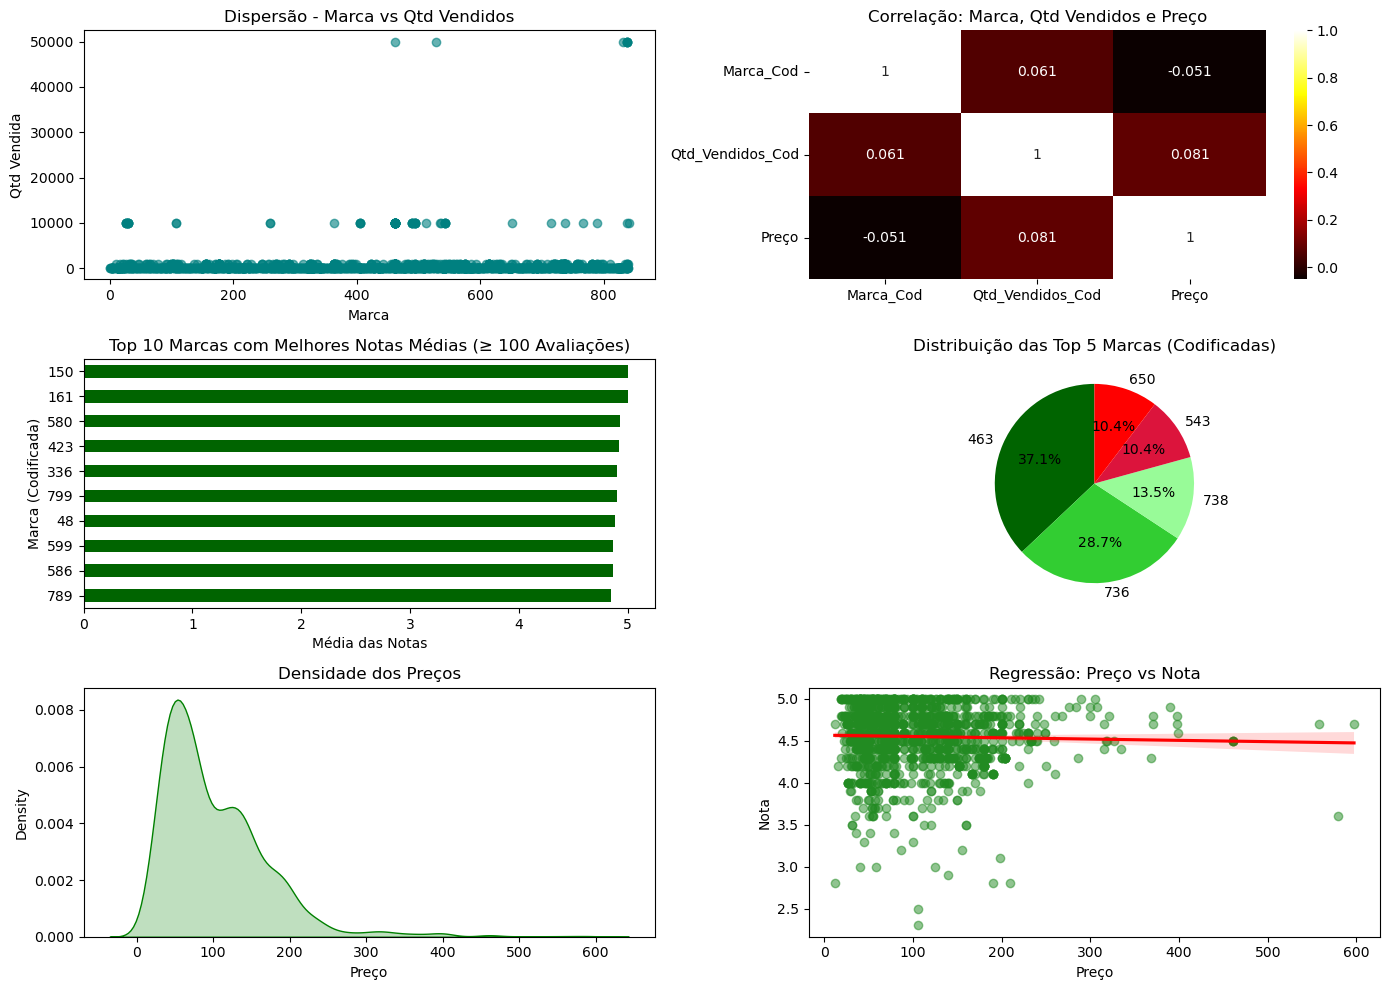

In [8]:
# Cria a figura para multiplos gráficos
plt.figure(figsize=(14, 10))

# Gráfico de Dispersão
plt.subplot(3, 2, 1)
plt.scatter(df['Marca_Cod'], df['Qtd_Vendidos_Cod'], alpha=0.6, color='teal')
plt.title('Dispersão - Marca vs Qtd Vendidos')
plt.xlabel('Marca')
plt.ylabel('Qtd Vendida')

# Mapa de Calor
plt.subplot(3, 2, 2)
corr = df[['Marca_Cod', 'Qtd_Vendidos_Cod','Preço']].corr()
sns.heatmap(corr, annot=True, cmap='hot')
plt.title('Correlação: Marca, Qtd Vendidos e Preço')

# Gráfico de Barras Horizontal
avaliacoes_marca = df.groupby('Marca_Cod')['N_Avaliações'].sum()
marcas_validas = avaliacoes_marca[avaliacoes_marca > 100].index
media_notas_validas = df[df['Marca_Cod'].isin(marcas_validas)].groupby('Marca_Cod')['Nota'].mean()
top_10_media = media_notas_validas.sort_values(ascending=False).head(10)

plt.subplot(3, 2, 3)
top_10_media.sort_values().plot(kind='barh', color='darkgreen')
plt.title('Top 10 Marcas com Melhores Notas Médias (≥ 100 Avaliações)')
plt.xlabel('Média das Notas')
plt.ylabel('Marca (Codificada)')
plt.xticks(rotation=0)

# Gráfico de Pizza
top_marcas = df['Marca_Cod'].value_counts().head(5)
plt.subplot(3, 2, 4)
top_marcas.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#006400', '#32CD32', '#98FB98', '#DC143C', '#FF0000'])
plt.title('Distribuição das Top 5 Marcas (Codificadas)')
plt.ylabel('')

# Gráfico de Densidade
plt.subplot(3, 2, 5)
sns.kdeplot(df['Preço'], fill=True, color='green')
plt.title('Densidade dos Preços')
plt.xlabel('Preço')

# Gráfico de Regressão
plt.subplot(3, 2, 6)
sns.regplot(x='Preço', y='Nota', data=df, scatter_kws={'alpha':0.5,'color':'forestgreen'}, line_kws={'color':'red'})
plt.title('Regressão: Preço vs Nota')
plt.xlabel('Preço')
plt.ylabel('Nota')

# Ajusta layout e exibe figura
plt.tight_layout()
plt.show()